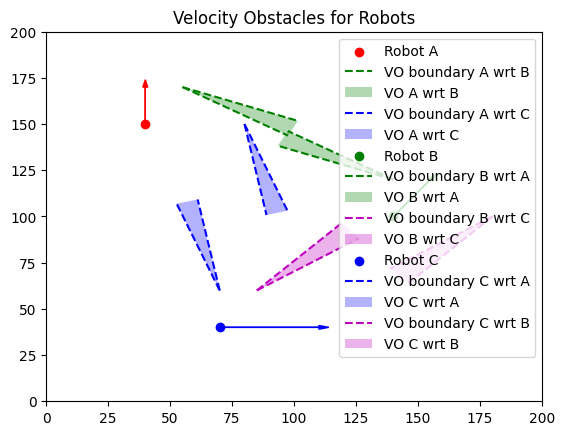

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_robot():
    """Generates a robot with random position, velocity, and radius."""
    position = np.array([random.uniform(0, 200), random.uniform(0, 200)])
    speed = random.uniform(10, 50)
    angle = random.uniform(0, 2 * np.pi)
    velocity = np.array([speed * np.cos(angle), speed * np.sin(angle)])
    radius = random.uniform(1, 5)
    return position, velocity, radius

def compute_velocity_obstacle(A, B):
    """Computes the velocity obstacle (VO) for robot A caused by robot B."""
    pos_A, vel_A, rad_A = A
    pos_B, vel_B, rad_B = B
    
    rel_position = pos_B - pos_A
    combined_radius = rad_A + rad_B
    
    # Compute the half-angle of the velocity obstacle cone
    dist = np.linalg.norm(rel_position)
    if dist == 0:
        return None  # Avoid division by zero
    
    theta = np.arcsin(combined_radius / dist)
    angle_to_B = np.arctan2(rel_position[1], rel_position[0])
    
    left_boundary = angle_to_B + theta
    right_boundary = angle_to_B - theta
    
    return rel_position, left_boundary, right_boundary, vel_B

def plot_velocity_obstacles(robots):
    """Plots the velocity obstacles for each robot."""
    fig, ax = plt.subplots()
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)
    ax.set_title("Velocity Obstacles for Robots")
    
    colors = ['r', 'g', 'b', 'm', 'c', 'y']  # Different colors for different cones
    for i, A in enumerate(robots):
        pos_A, vel_A, rad_A = A
        ax.scatter(*pos_A, c=colors[i], label=f'Robot {chr(65+i)}')
        ax.arrow(*pos_A, *vel_A, head_width=2, head_length=4, fc=colors[i], ec=colors[i])
        
        for j, B in enumerate(robots):
            if i != j:
                result = compute_velocity_obstacle(A, B)
                if result:
                    rel_pos, left_b, right_b, vel_B = result
                    
                    # Corrected: VO apex should be at pos_A + vel_B
                    VO_apex = pos_A + vel_B  
                    left_vec = np.array([np.cos(left_b), np.sin(left_b)]) * 50
                    right_vec = np.array([np.cos(right_b), np.sin(right_b)]) * 50
                    
                    cone_color = colors[(i + j) % len(colors)]  # Assign unique color per cone
                    ax.plot([VO_apex[0], VO_apex[0] + left_vec[0]],
                            [VO_apex[1], VO_apex[1] + left_vec[1]], f'{cone_color}--', label=f'VO boundary {chr(65+i)} wrt {chr(65+j)}')
                    ax.plot([VO_apex[0], VO_apex[0] + right_vec[0]],
                            [VO_apex[1], VO_apex[1] + right_vec[1]], f'{cone_color}--')
                    ax.fill([VO_apex[0], VO_apex[0] + left_vec[0], VO_apex[0] + right_vec[0]],
                            [VO_apex[1], VO_apex[1] + left_vec[1], VO_apex[1] + right_vec[1]],
                            cone_color, alpha=0.3, label=f'VO {chr(65+i)} wrt {chr(65+j)}')
    
    ax.legend()
    plt.show()

# Generate robots with random properties
#robots = [generate_robot() for _ in range(3)]
robots = [(np.array([40, 150]), np.array([0, 20]), 5), (np.array([140, 100]), np.array([15, 20]), 5), (np.array([70, 40]), np.array([40, 0]), 5)]

plot_velocity_obstacles(robots)